### This jupyter notebook is to unit-test CFE model run

## Preparation

In [1]:
# Import modules
import os
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import json
from bmi_cfe import BMI_CFE

In [4]:
# Input: Mahurangi data for 3 yrs
# forcing: Mahurangi/mahurangi_1998_2001.csv
# observed: test_sm_basinavg

# Input: Little Washita data for 12 yrs
# forcing: LittleWashita/little_washita_2006_2012.csv
# observed: test_sm_basinavg


# Parameter: only limited number of parameters

input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/LittleWashita/little_washita_2006_2012.csv",
    "catchment_area_km2": 46.65, 
    "soil_params": { # bounds, init
        "bb": 10, # 2-15, 8.17
        "satdk": 0.00013888888, # 1E-07-1E-05, but can be larger? 
        "slop": 1, # 0-1, 0.02
        "satpsi": 0.78, # 0.02-0.78, 0.263 
        "smcmax": 0.9,  # 0.33-0.7, 0.57
        "wltsmc": 0.310002781,  # 0-0.7, 0.35 or 0.17
        "D": 0.87                     # fixed 
    },   
    "max_gw_storage":250,        # 10-250, 16 or 50
    "Cgw": 0.2, # ?, 0.01 or 1
    "expon": 1, # 1-8, 3 or 6
    "lksatfac": 10000, # 10-10000
    "dd": 0.035,
    "K_nash":0.1,         
    "nash_storage": [0.0, 0.0, 0.0],                  # fixed
    "giuh_ordinates": [0.1, 0.2, 0.4, 0.2, 0.1], # [0.1, 0.35, 0.2, 0.14, 0.1, 0.06, 0.05], # fixed # 
    "trigger_z_fact":0.8,         # 0.01-0.87
    "alpha_fc": 0.33,         # 0.01-0.33
    "refkdt":0.496733933,            # 0.1-4, 3
    "stand_alone": 1,
    "unit_test": 1,
    "compare_results_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/LittleWashita/test_sm_basinavg.csv",
}

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

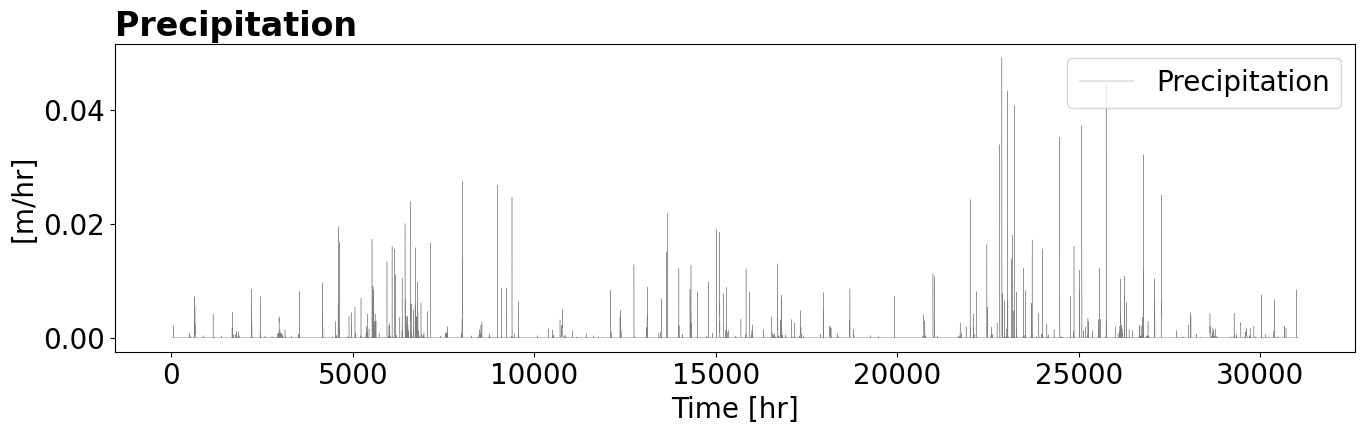

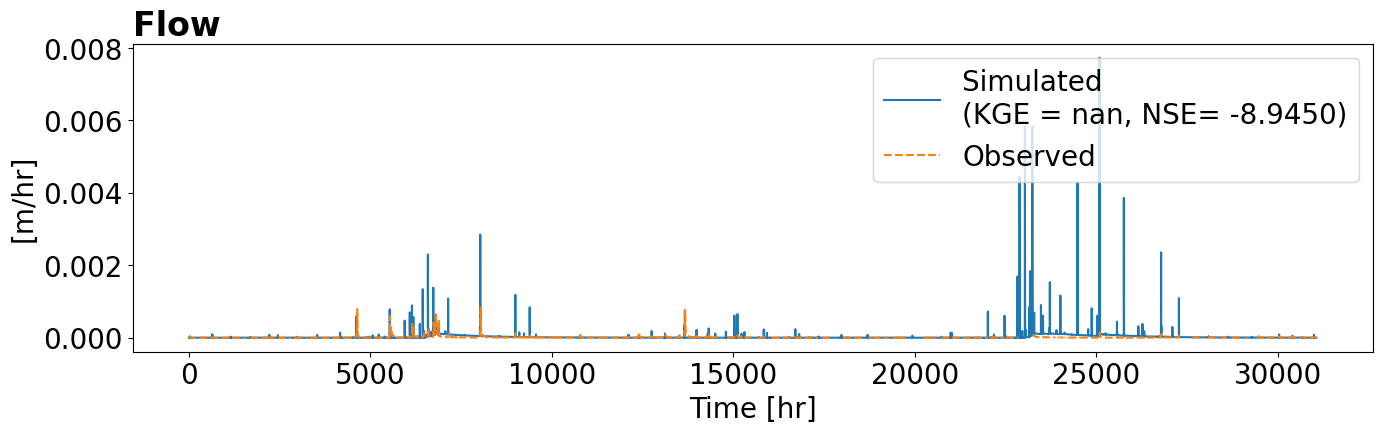

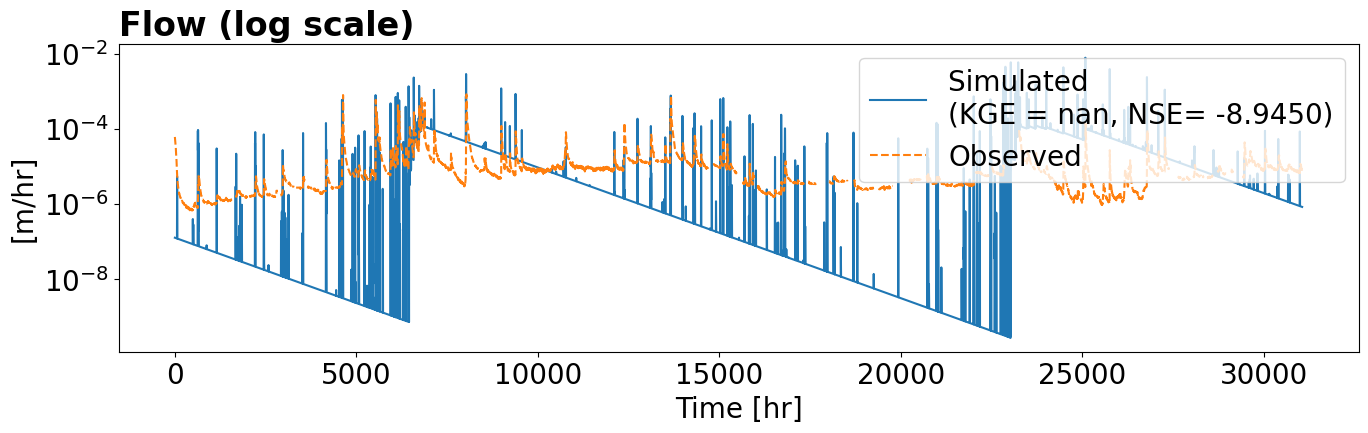

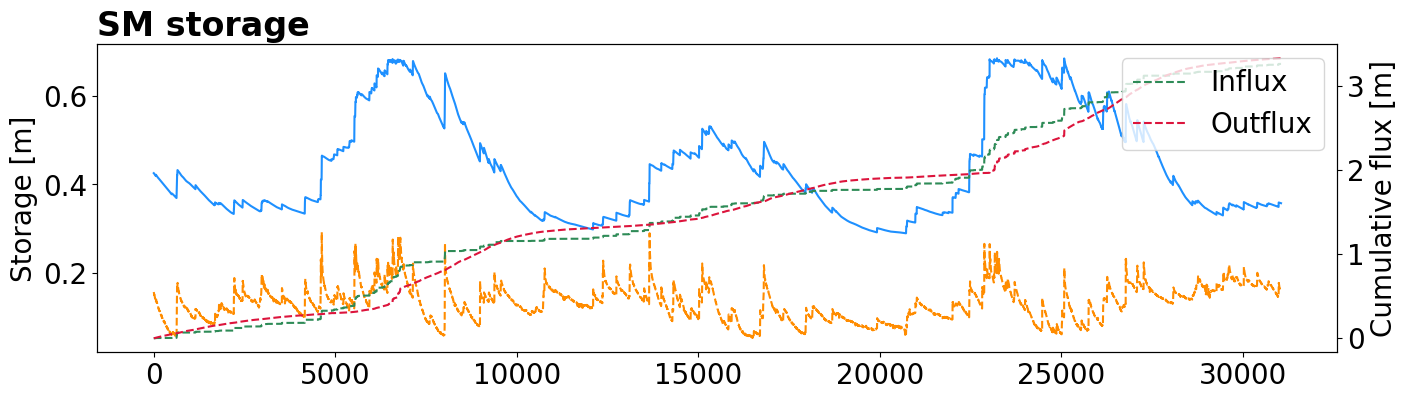

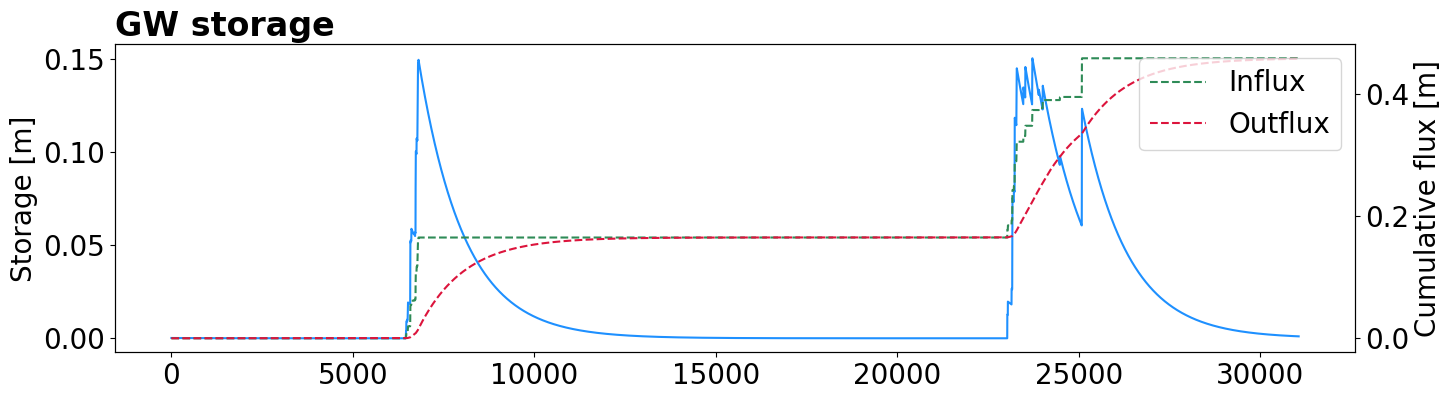

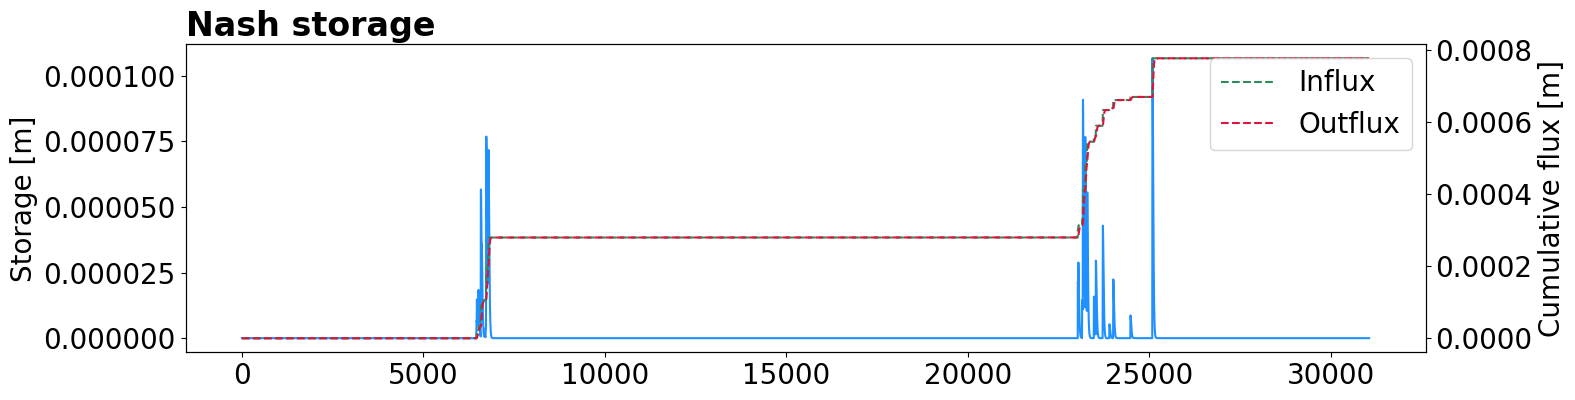

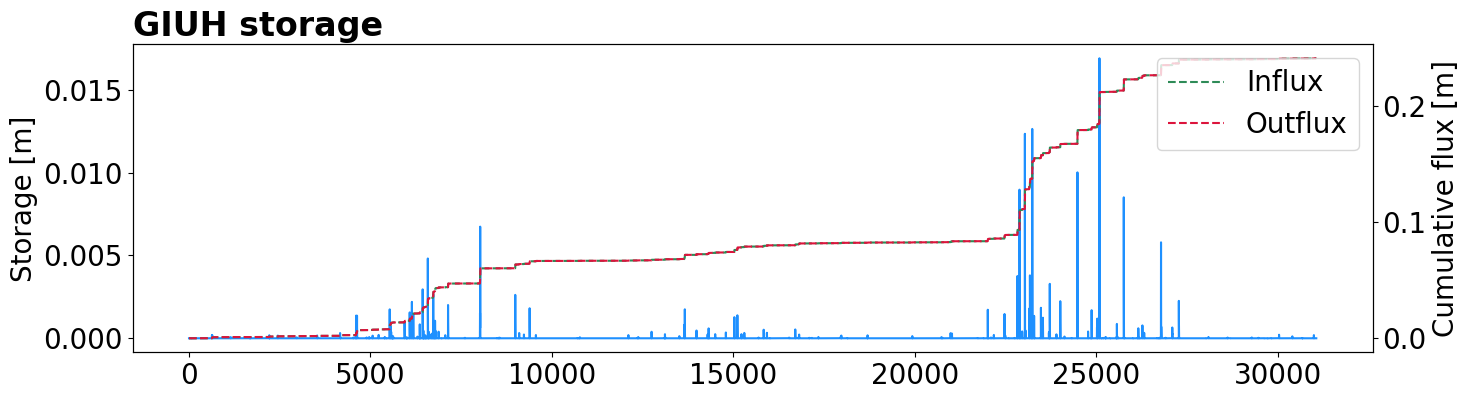


GLOBAL MASS BALANCE
  initial volume: 250.7830
    volume input:   7.9287
   volume output: 258.3413
    final volume:   0.3687
        residual: 1.6941e-03

 AET & PET
      volume PET:  18.8975
      volume AET:   7.2139
ET from rainfall:   0.8735
    ET from soil:   6.3404

SCHAAKE MASS BALANCE
    volume input:   7.9287
ET from rainfall:   0.8735
  surface runoff:   0.4926
             IOF:   0.3919
             SOF:   0.1007
    infiltration:   6.5627
schaake residual: -3.5527e-15

GIUH MASS BALANCE
  vol. into giuh:   0.4926
   vol. out giuh:   0.4926
 vol. end giuh q:   0.0000
   giuh residual: 1.2768e-15

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.7830
  vol. into soil:   6.5627
vol.soil2latflow:   0.0012
 vol. soil to gw:   0.6337
 vol. soil to ET:   6.3404
 final vol. soil:   0.3687
vol. soil resid.: 1.6941e-03

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   0.0012
  vol. from nash:   0.0012
 final vol. nash:   0.0000
nash casc res

In [5]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(plot=True, print_fluxes=False, warm_up=True)
cfe_instance.finalize(print_mass_balance=True)